#deskripsi library yang digunakan

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Memanggil dataset

In [2]:
df = pd.read_csv('volkswagen.csv')

Deskripsi dataset

In [3]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0
1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0
2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0
3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15157 entries, 0 to 15156
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         15157 non-null  object 
 1   year          15157 non-null  int64  
 2   price         15157 non-null  int64  
 3   transmission  15157 non-null  object 
 4   mileage       15157 non-null  int64  
 5   fuelType      15157 non-null  object 
 6   tax           15157 non-null  int64  
 7   mpg           15157 non-null  float64
 8   engineSize    15157 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.0+ MB


In [5]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000
mean,2017.255789,16838.952365,22092.785644,112.744277,53.753355,1.600693
std,2.053059,7755.015206,21148.941635,63.482617,13.642182,0.461695
min,2000.000000,899.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,10990.000000,5962.000000,30.000000,46.300000,1.200000
50%,2017.000000,15497.000000,16393.000000,145.000000,53.300000,1.600000
75%,2019.000000,20998.000000,31824.000000,145.000000,60.100000,2.000000
max,2020.000000,69994.000000,212000.000000,580.000000,188.300000,3.200000


VISUALISASI DATA

<AxesSubplot:>

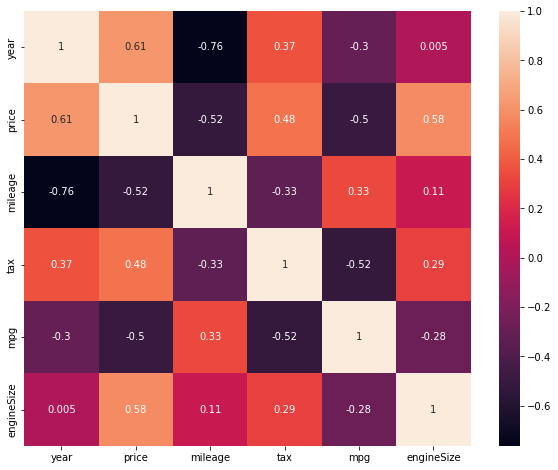

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

JUMLAH MOBIL BERDASARKAN MODEL

In [7]:
models = df.groupby('model').count()[['tax']].sort_values(by='tax', ascending=True).reset_index()
models = models.rename(columns={'tax': 'NumberofCars'})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, ' Caddy Maxi'),
  Text(1, 0, ' Fox'),
  Text(2, 0, ' Caddy'),
  Text(3, 0, ' Eos'),
  Text(4, 0, ' Caddy Life'),
  Text(5, 0, ' California'),
  Text(6, 0, ' Jetta'),
  Text(7, 0, ' Caddy Maxi Life'),
  Text(8, 0, ' Shuttle'),
  Text(9, 0, ' Beetle'),
  Text(10, 0, ' Tiguan Allspace'),
  Text(11, 0, ' CC'),
  Text(12, 0, ' Caravelle'),
  Text(13, 0, ' Amarok'),
  Text(14, 0, ' Scirocco'),
  Text(15, 0, ' Arteon'),
  Text(16, 0, ' Sharan'),
  Text(17, 0, ' Golf SV'),
  Text(18, 0, ' T-Cross'),
  Text(19, 0, ' Touran'),
  Text(20, 0, ' Touareg'),
  Text(21, 0, ' T-Roc'),
  Text(22, 0, ' Up'),
  Text(23, 0, ' Passat'),
  Text(24, 0, ' Tiguan'),
  Text(25, 0, ' Polo'),
  Text(26, 0, ' Golf')])

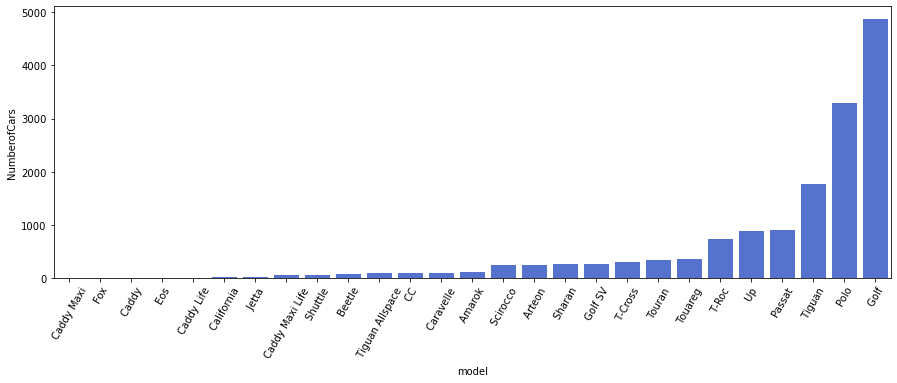

In [8]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=models['model'], y=models['NumberofCars'], color='royalblue')
plt.xticks(rotation=60)

UKURAN MESIN

In [9]:
engine = df.groupby('engineSize').count()[['tax']].sort_values(by='tax').reset_index()
engine = engine.rename(columns={'tax':'count'})

<AxesSubplot:xlabel='engineSize', ylabel='count'>

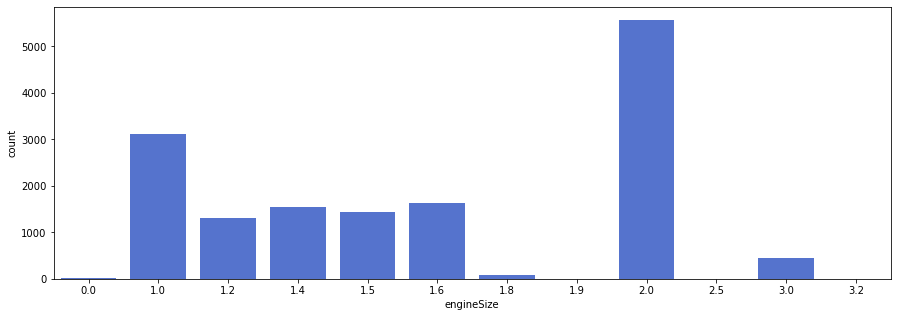

In [10]:
plt.figure(figsize=(15,5))
sns.barplot(x=engine['engineSize'], y=engine['count'], color='royalblue')

DISTRIBUSI MILEAGE

c:\Users\ASUS VivoBOOK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mileage', ylabel='Density'>

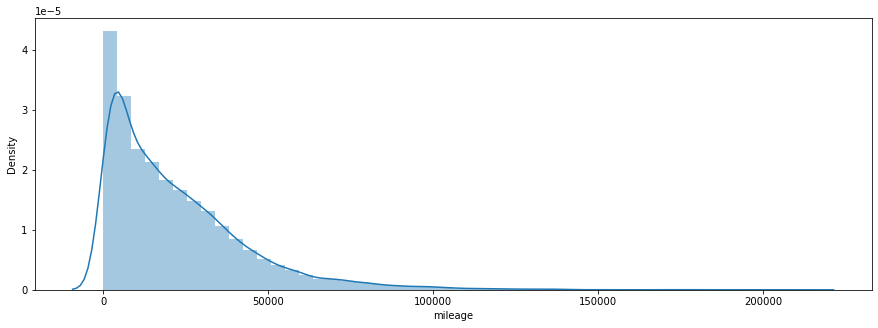

In [11]:
plt.figure(figsize=(15,5))
sns.distplot(df['mileage'])

DISTRIBUSI HARGA MOBIL

c:\Users\ASUS VivoBOOK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

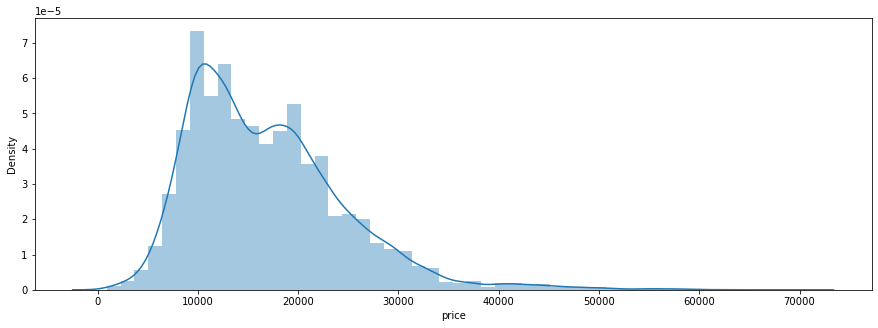

In [12]:
plt.figure(figsize=(15,5))
sns.distplot(df['price'])

SELEKSI FITUR

In [13]:
features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
x = df[features]
y = df['price']
x.shape, y.shape

((15157, 5), (15157,))

SPLIT DATA TRAINING DAN DATA TESTING

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(3790,)

MODEL REGRESI LINIER

In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)

In [16]:
score = lr.score(x_test, y_test)
print('akurasi model regresi linier = ', score)

akurasi model regresi linier =  0.759199432287557


INPUT MODEL REGRESI LINIER

In [17]:
#year=2019, mileage=5000, tax=45, mpg=30, enginesize=2
input_data = np.array([[2019, 5000, 145, 30, 2]])

prediction = lr.predict(input_data)
print('Estimasi Harga: ', prediction)

Estimasi Harga:  [26556.56023721]


c:\Users\ASUS VivoBOOK\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


SAVING MODEL PICKLE

In [18]:
import pickle

filename = 'volkswagen.sav'
pickle.dump(lr, open(filename, 'wb'))